<img src="../../images/arm_logo.png" width=500 alt="ARM Logo"></img>

# Quantitative Precipitation Estimate (QPE) Analysis with Py-ART
---

## Overview

Within this notebook, we will cover:
1. Calculation of QPE from various radar fields
1. Genearting a gridded QPE product
1. Comparison against operational models (MRMS)

## Prerequisites
| Concepts | Importance | Notes |
| --- | --- | --- |
| [Py-ART Basics](pyart-basics) | Helpful | Basic features |
| [Weather Radar Basics](https://projectpythia.org/radar-cookbook/README.html) | Helpful | Background Information |
| [Matplotlib Basics](https://foundations.projectpythia.org/core/matplotlib/matplotlib-basics.html) | Helpful | Basic plotting |
| [NumPy Basics](https://foundations.projectpythia.org/core/numpy/numpy-basics.html) | Helpful | Basic arrays |
| [Xarray Basics](https://foundations.projectpythia.org/core/xarray.html) | Helpful | Multi-dimensional arrays |

- **Time to learn**: 15 minutes
---

## Imports

In [1]:
import os
import warnings
import glob

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

import pyart
from pyart.testing import get_test_data
import xradar as xd

warnings.filterwarnings('ignore')


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



## Investigate the Available Data

In [ ]:
file_list = sorted(glob.glob("/data/project/ARM_Summer_School_2025/radar/csapr2/ppi/*20250519*"))
file_list

['/Users/jrobrien/ANL/Instruments/csapr2/bnf/bnfcsapr2cfrS3.a1.20250422.040012.nc',
 '/Users/jrobrien/ANL/Instruments/csapr2/bnf/bnfcsapr2cfrS3.a1.20250422.040955.nc',
 '/Users/jrobrien/ANL/Instruments/csapr2/bnf/bnfcsapr2cfrS3.a1.20250422.041013.nc',
 '/Users/jrobrien/ANL/Instruments/csapr2/bnf/bnfcsapr2cfrS3.a1.20250422.041958.nc',
 '/Users/jrobrien/ANL/Instruments/csapr2/bnf/bnfcsapr2cfrS3.a1.20250422.042016.nc',
 '/Users/jrobrien/ANL/Instruments/csapr2/bnf/bnfcsapr2cfrS3.a1.20250422.043000.nc',
 '/Users/jrobrien/ANL/Instruments/csapr2/bnf/bnfcsapr2cfrS3.a1.20250422.043018.nc',
 '/Users/jrobrien/ANL/Instruments/csapr2/bnf/bnfcsapr2cfrS3.a1.20250422.044013.nc',
 '/Users/jrobrien/ANL/Instruments/csapr2/bnf/bnfcsapr2cfrS3.a1.20250422.045019.nc',
 '/Users/jrobrien/ANL/Instruments/csapr2/bnf/bnfcsapr2cfrS3.a1.20250422.045037.nc']

In [3]:
dt = xd.io.open_cfradial1_datatree(file_list[0])
dt

<xarray.DataTree>
Group: /
│   Dimensions:              (sweep: 15)
│   Dimensions without coordinates: sweep
│   Data variables:
│       sweep_fixed_angle    (sweep) float32 60B ...
│       sweep_group_name     (sweep) <U10 600B 'sweep_0.0' ... 'sweep_14.0'
│       time_coverage_end    |S22 22B ...
│       time_coverage_start  |S22 22B ...
│       volume_number        float64 8B ...
│       latitude             float32 4B ...
│       longitude            float32 4B ...
│       altitude             float32 4B ...
│   Attributes:
│       Conventions:      ARM-1.3 CF/Radial-1.4 instrument_parameters radar_param...
│       title:            ARM CSAPR2 Moments
│       institution:      U.S. Department of Energy Atmospheric Radiation Measure...
│       references:       See Instrument Handbook
│       comment:          
│       instrument_name:  CSAPR2
│       scan_name:        ppi
│       site_name:        bnfS3
│       source:           FROG 4.7.10:branch-4.7:muran-4.7.10:1001:mars-lxc-u20:2...
│       history:          created by user dsmgr on machine prod-proc4.adc.arm.gov...
├── Group: /sweep_0
│       Dimensions:                                                (azimuth: 361,
│                                                                   range: 1100)
│       Coordinates:
│           time                                                   (azimuth) datetime64[ns] 3kB ...
│         * range                                                  (range) float32 4kB ...
│         * azimuth                                                (azimuth) float32 1kB ...
│           elevation                                              (azimuth) float32 1kB ...
│           latitude                                               float32 4B ...
│           longitude                                              float32 4B ...
│           altitude                                               float32 4B ...
│       Data variables: (12/38)
│           time_offset                                            (azimuth) datetime64[ns] 3kB ...
│           attenuation_corrected_differential_reflectivity        (azimuth, range) float32 2MB ...
│           attenuation_corrected_differential_reflectivity_lag_1  (azimuth, range) float32 2MB ...
│           attenuation_corrected_reflectivity_h                   (azimuth, range) float32 2MB ...
│           censor_mask                                            (azimuth, range) int32 2MB ...
│           classification_mask                                    (azimuth, range) int32 2MB ...
│           ...                                                     ...
│           unthresholded_power_copolar_v                          (azimuth, range) float32 2MB ...
│           sweep_fixed_angle                                      float32 4B ...
│           nyquist_velocity                                       (azimuth) float32 1kB ...
│           prt                                                    (azimuth) float32 1kB ...
│           sweep_mode                                             <U6 24B 'sector'
│           sweep_number                                           float64 8B ...
├── Group: /sweep_1
│       Dimensions:                                                (azimuth: 360,
│                                                                   range: 1100)
│       Coordinates:
│           time                                                   (azimuth) datetime64[ns] 3kB ...
│         * range                                                  (range) float32 4kB ...
│         * azimuth                                                (azimuth) float32 1kB ...
│           elevation                                              (azimuth) float32 1kB ...
│           latitude                                               float32 4B ...
│           longitude                                              float32 4B ...
│           altitude                                               float32 4B ...
│       Data variabl

In [4]:
radar = pyart.xradar.Xradar(dt)
display = pyart.graph.RadarDisplay(radar)

In [5]:
radar

<xarray.DataTree>
Group: /
│   Dimensions:              (sweep: 15)
│   Dimensions without coordinates: sweep
│   Data variables:
│       sweep_fixed_angle    (sweep) float32 60B 1.5 2.499 3.499 ... 26.0 33.0 42.0
│       sweep_group_name     (sweep) <U10 600B 'sweep_0.0' ... 'sweep_14.0'
│       time_coverage_end    |S22 22B b'2025-04-22T04:09:30Z'
│       time_coverage_start  |S22 22B b'2025-04-22T04:00:12Z'
│       volume_number        float64 8B 0.0
│       latitude             float32 4B 34.63
│       longitude            float32 4B -87.13
│       altitude             float32 4B 180.0
│   Attributes:
│       Conventions:      ARM-1.3 CF/Radial-1.4 instrument_parameters radar_param...
│       title:            ARM CSAPR2 Moments
│       institution:      U.S. Department of Energy Atmospheric Radiation Measure...
│       references:       See Instrument Handbook
│       comment:          
│       instrument_name:  CSAPR2
│       scan_name:        ppi
│       site_name:        bnfS3
│       source:           FROG 4.7.10:branch-4.7:muran-4.7.10:1001:mars-lxc-u20:2...
│       history:          created by user dsmgr on machine prod-proc4.adc.arm.gov...
├── Group: /sweep_0
│       Dimensions:                                                (azimuth: 361,
│                                                                   range: 1100)
│       Coordinates:
│           time                                                   (azimuth) datetime64[ns] 3kB ...
│         * range                                                  (range) float32 4kB ...
│         * azimuth                                                (azimuth) float32 1kB ...
│           elevation                                              (azimuth) float32 1kB ...
│           latitude                                               float32 4B ...
│           longitude                                              float32 4B ...
│           altitude                                               float32 4B ...
│       Data variables: (12/38)
│           time_offset                                            (azimuth) datetime64[ns] 3kB ...
│           attenuation_corrected_differential_reflectivity        (azimuth, range) float32 2MB ...
│           attenuation_corrected_differential_reflectivity_lag_1  (azimuth, range) float32 2MB ...
│           attenuation_corrected_reflectivity_h                   (azimuth, range) float32 2MB ...
│           censor_mask                                            (azimuth, range) int32 2MB ...
│           classification_mask                                    (azimuth, range) int32 2MB ...
│           ...                                                     ...
│           unthresholded_power_copolar_v                          (azimuth, range) float32 2MB ...
│           sweep_fixed_angle                                      float32 4B ...
│           nyquist_velocity                                       (azimuth) float32 1kB ...
│           prt                                                    (azimuth) float32 1kB ...
│           sweep_mode                                             <U6 24B 'sector'
│           sweep_number                                           float64 8B ...
├── Group: /sweep_1
│       Dimensions:                                                (azimuth: 360,
│                                                                   range: 1100)
│       Coordinates:
│           time                                                   (azimuth) datetime64[ns] 3kB ...
│         * range                                                  (range) float32 4kB ...
│         * azimuth                                                (azimuth) float32 1kB ...
│           elevation                                              (azimuth) float32 1kB ...
│           latitude                                               float32 4B ...
│           longitude                                              float32 4B ...
│           altitude    

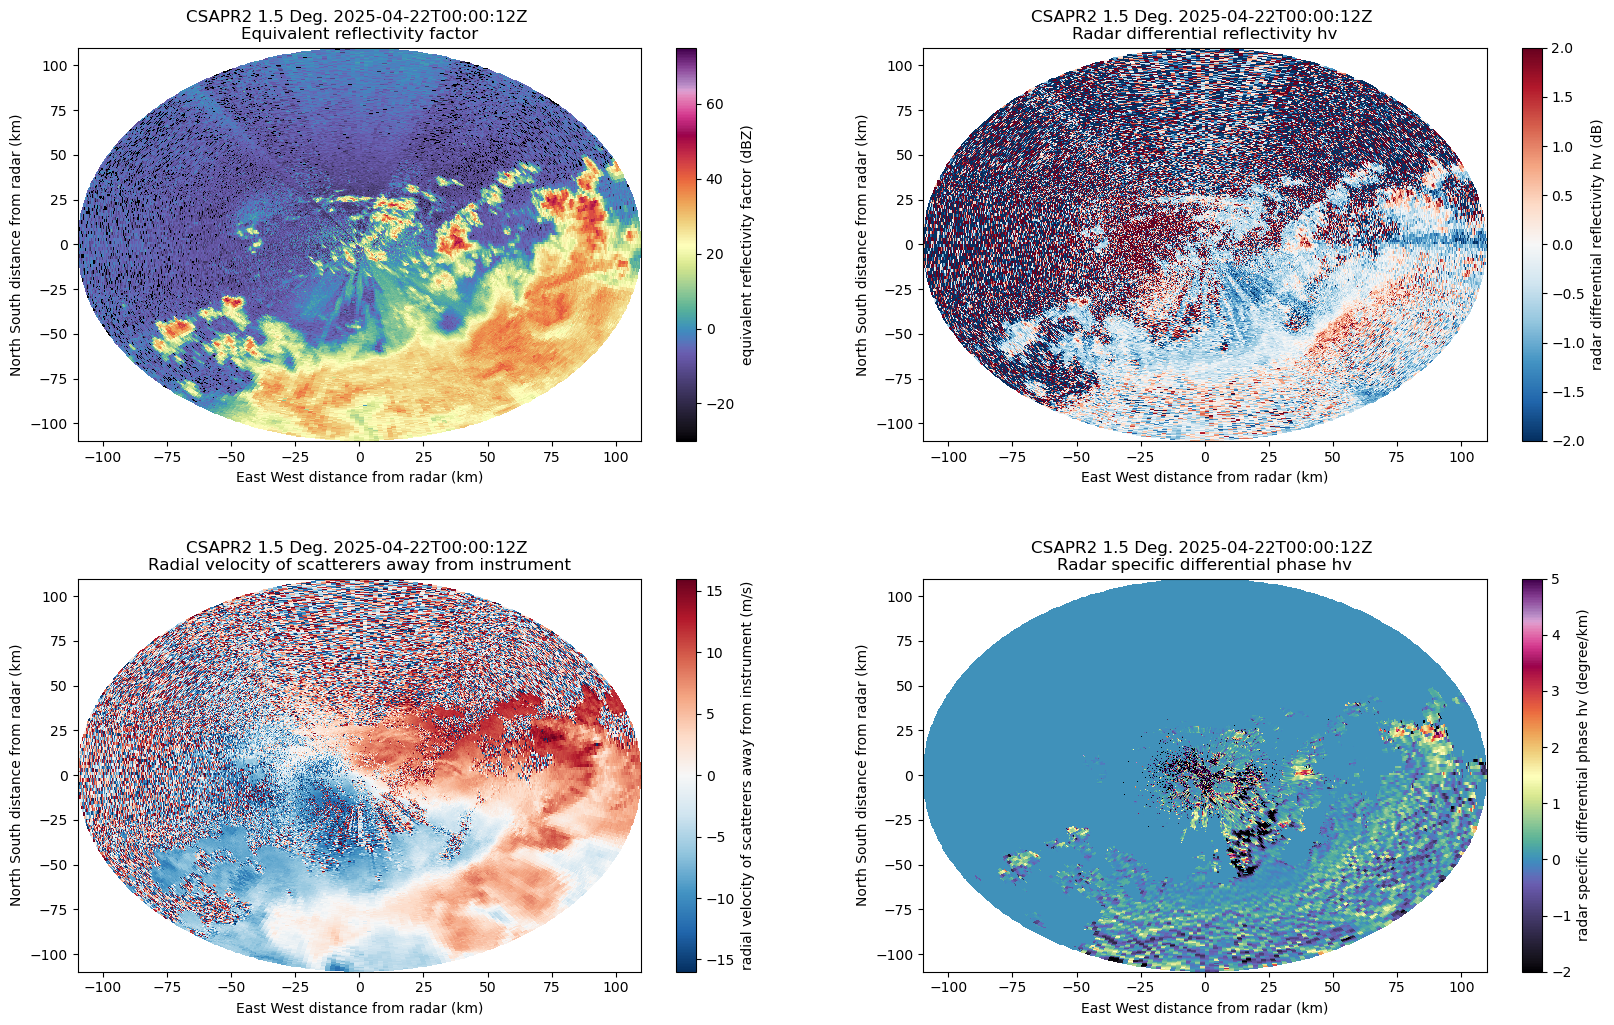

In [6]:
# Generate matplotlib figure and axe array objects
fig, axarr = plt.subplots(2, 2, figsize=[20, 12])
plt.subplots_adjust(hspace=0.35)

# reflectivity
display.plot('reflectivity', sweep=0, ax=axarr[0, 0], cmap='ChaseSpectral')

# differential reflectivity
display.plot("differential_reflectivity", sweep=0, ax=axarr[0, 1], cmap="RdBu_r", vmin=-2, vmax=2)

# doppler velocity
display.plot("mean_doppler_velocity", sweep=0, ax=axarr[1, 0], cmap="RdBu_r", vmin=-16, vmax=16)

# differential phase
display.plot("specific_differential_phase", sweep=0, ax=axarr[1, 1], cmap="ChaseSpectral")

## QPE Functions 

In [7]:
def reflectivity_rain(radar, refl="reflectivity", alpha=0.0376, beta=0.6112):
    """
    Function to calculate rainfall rates from radar reflectivity factor

    Inputs
    ------
    radar : Py-ART Radar Object
        Py-ART radar object to extract reflectivity field from
    refl : str
        Specific name of reflectivity field within radar object
    alpha : float
        fit parameter
    beta : float
        fit parameter

    Outputs
    -------
    radar : Py-ART Radar Object
        Py-ART radar object with rainfall estimate from reflectivity included
    """
    # define a gatefilter to apply the relationship to
    gatefilter_z = pyart.correct.GateFilter(radar)
    gatefilter_z.exclude_above(refl, 35)
    # Apply the gatefilter to the rain rate
    masked_z = np.ma.masked_array(radar.fields[refl]['data'], mask=gatefilter_z.gate_excluded) 
    # Apply the R(Z) relationship
    rr_data = alpha * np.ma.power(np.ma.power(10.0, 0.1 * masked_z), beta)
    # define the dictionary structure for the rain rate data
    rain = pyart.config.get_metadata("radar_estimated_rain_rate")
    rain["long_name"] = "R(Z) Radar Estimated Rain Rate"
    rain["standard_name"] = "R(Z) Radar Estimated Rain Rate"
    rain["data"] = rr_data
    # add the field back into the radar object
    radar.add_field("rain_z", rain)

    return radar

In [8]:
def kdp_rain(radar, phase="specific_differential_phase", alpha=25.1, beta=0.777):
    """
    Function to calculate rainfall rates from specific differential phase
    Inputs
    ------
    radar : Py-ART Radar Object
        Py-ART radar object to extract reflectivity field from
    refl : str
        Specific name of reflectivity field within radar object
    alpha : float
        fit parameter
    beta : float
        fit parameter

    Outputs
    -------
    radar : Py-ART Radar Object
        Py-ART radar object with rainfall estimate from reflectivity included
    """
    # define a gatefilter to apply the relationship to
    gatefilter_kdp = pyart.correct.GateFilter(radar)
    gatefilter_kdp.exclude_below('reflectivity', 35)
    # Apply the gatefilter to the rain rate
    masked_z = np.ma.masked_array(radar.fields[phase]['data'], mask=gatefilter_kdp.gate_excluded) 
    # define the reflectivity data
    reflect = radar.fields[phase]["data"]
    rr_data = alpha * np.ma.power(np.ma.power(10.0, 0.1 * masked_z), beta)
    # define the dictionary structure for the rain rate data
    rain = pyart.config.get_metadata("radar_estimated_rain_rate")
    rain["long_name"] = "R(KDP) Radar Estimated Rain Rate"
    rain["standard_name"] = "R(KDP) Radar Estimated Rain Rate"
    rain["data"] = rr_data
    # add the field back into the radar object
    radar.add_field("rain_kdp", rain)

    return radar

In [9]:
# Apply the Radar estimated rain rates 
radar = reflectivity_rain(radar)
radar = kdp_rain(radar)
radar["sweep_1"]

<xarray.DataTree 'sweep_1'>
Group: /sweep_1
    Dimensions:                                                (sweep: 15,
                                                                azimuth: 360,
                                                                range: 1100)
    Coordinates:
        time                                                   (azimuth) datetime64[ns] 3kB ...
      * range                                                  (range) float32 4kB ...
      * azimuth                                                (azimuth) float32 1kB ...
        elevation                                              (azimuth) float32 1kB ...
        latitude                                               float32 4B ...
        longitude                                              float32 4B ...
        altitude                                               float32 4B ...
    Dimensions without coordinates: sweep
    Data variables: (12/40)
        time_offset                                            (azimuth) datetime64[ns] 3kB ...
        attenuation_corrected_differential_reflectivity        (azimuth, range) float32 2MB ...
        attenuation_corrected_differential_reflectivity_lag_1  (azimuth, range) float32 2MB ...
        attenuation_corrected_reflectivity_h                   (azimuth, range) float32 2MB ...
        censor_mask                                            (azimuth, range) int32 2MB ...
        classification_mask                                    (azimuth, range) int32 2MB ...
        ...                                                     ...
        nyquist_velocity                                       (azimuth) float32 1kB ...
        prt                                                    (azimuth) float32 1kB ...
        sweep_mode                                             <U6 24B 'sector'
        sweep_number                                           float64 8B ...
        rain_z                                                 (azimuth, range) float64 3MB ...
        rain_kdp                                               (azimuth, range) float64 3MB ...

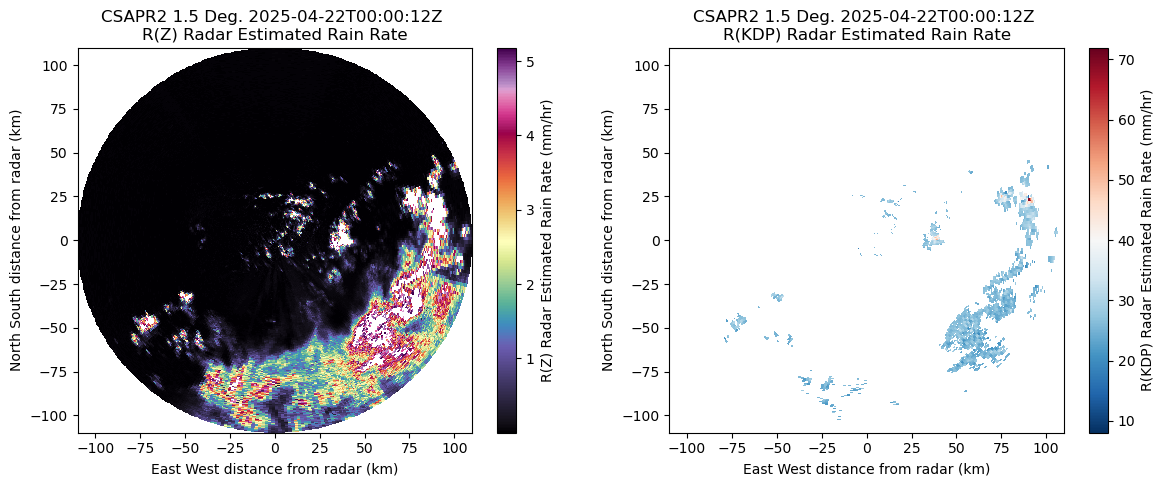

In [10]:
display = pyart.graph.RadarDisplay(radar)
# Generate matplotlib figure and axe array objects
fig, axarr = plt.subplots(1, 2, figsize=[14, 5])
plt.subplots_adjust(wspace=0.2, hspace=0.35)

# reflectivity
display.plot('rain_z', sweep=0, ax=axarr[0], cmap='ChaseSpectral')

# differential reflectivity
display.plot("rain_kdp", sweep=0, ax=axarr[1], cmap="RdBu_r")

## Combined Radar Estimated Rainfall Product

In [11]:
radar.fields["rain_z"]["data"].mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]],
      shape=(5404, 1100))

In [12]:
combined_data = np.where(~radar.fields["rain_z"]["data"].mask, radar.fields["rain_z"]["data"], radar.fields["rain_kdp"]["data"])
# Combine the masks using logical OR (mask where either is masked)
combined_mask = np.ma.mask_or(radar.fields["rain_z"]["data"].mask, radar.fields["rain_kdp"]["data"].mask)

# Merge data and apply the combined mask
merged = np.ma.array(combined_data, mask=combined_mask)

In [13]:
combined_data

array([[6.29473152e-01, 3.03820546e-01, 2.61516589e-01, ...,
        3.61319993e-02, 2.58389034e-02, 1.74548633e-02],
       [2.49012147e-01, 2.79886352e-01, 2.30277542e-01, ...,
        2.98860935e-02, 3.99697268e-02, 4.71118476e-02],
       [2.47254486e-01, 3.21155861e-01, 3.43309343e-01, ...,
        3.01430022e-02, 3.31679322e-02, 3.12666570e-02],
       ...,
       [1.09840905e-01, 1.09840905e-01, 3.44958609e-02, ...,
        2.36214141e-02, 1.74136969e-02, 4.84971346e-07],
       [1.42334559e-01, 1.14171141e-01, 4.22503148e-02, ...,
        4.84971346e-07, 6.66905699e-04, 4.84971346e-07],
       [9.07730207e-02, 1.00177559e-01, 3.24130562e-02, ...,
        4.84971346e-07, 2.93008889e-02, 1.29019468e-02]],
      shape=(5404, 1100))

In [15]:
# define the dictionary structure for the rain rate data
rain = pyart.config.get_metadata("radar_estimated_rain_rate")
rain["long_name"] = "R(Z+KDP) Radar Estimated Rain Rate"
rain["standard_name"] = "R(Z+KDP) Radar Estimated Rain Rate"
rain["data"] = combined_data
# add the field back into the radar object
radar.add_field("rain_combined", rain)

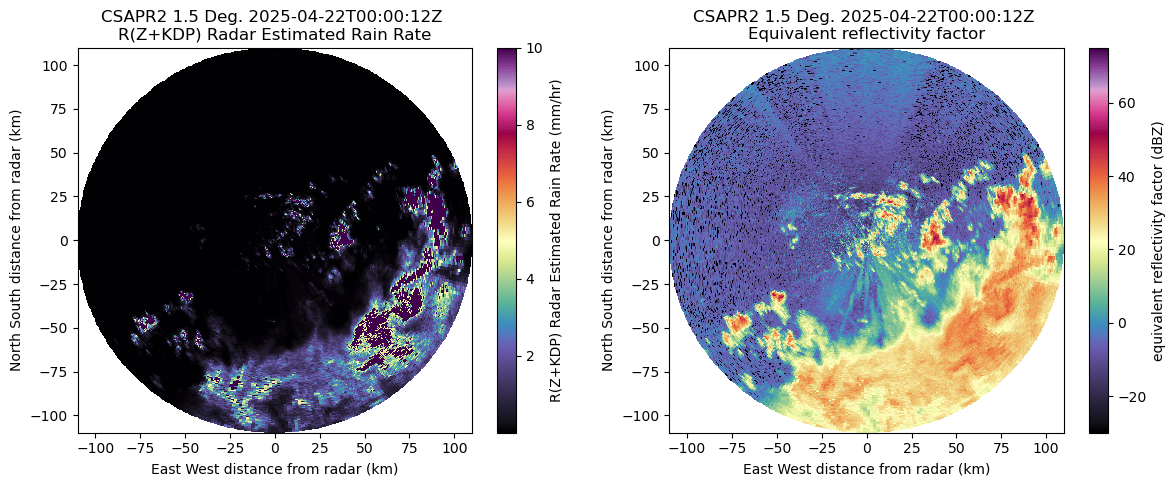

In [28]:
display = pyart.graph.RadarDisplay(radar)
# Generate matplotlib figure and axe array objects
fig, axarr = plt.subplots(1, 2, figsize=[14, 5])
plt.subplots_adjust(wspace=0.2, hspace=0.35)

# reflectivity
display.plot('rain_combined', sweep=0, ax=axarr[0], cmap='ChaseSpectral', vmax=10)
# reflectivity
display.plot('reflectivity', sweep=0, ax=axarr[1], cmap='ChaseSpectral')

## Create a Gridded QPE Product for Future Comparison with Model/MRMS

In [39]:
def bnf_grid(radar, 
             z_limits=(250., 15_000.), 
             y_limits=(-30_000., 30_000), 
             x_limits=(-30_000., 30_000),
             resolution=250
):
    """
    Function to create a Py-ART grid object from a given radar file

    Inputs
    ------
    radar : Py-ART radar object
        Py-ART radar object to create a grid object from
    z_limits : tuple
        vertical dimension grid limits
    y_limits : tuple
        longitude dimension grid limits
    x_limits : tuple
        latitude dimension grid limits
    resolution : float
        desired resolution of our grid object

    Calls
    -----
    compute_number_of_points
        compute number of gates in each direction

    Outputs
    -------
    grid : Py-ART Grid object
    """
    def compute_number_of_points(extent, resolution):
        return int((extent[1] - extent[0])/resolution)

    z_grid_points = compute_number_of_points(z_limits, resolution)
    x_grid_points = compute_number_of_points(x_limits, resolution)
    y_grid_points = compute_number_of_points(y_limits, resolution)

    grid = pyart.map.grid_from_radars([radar],
                                      grid_shape=(z_grid_points,
                                                  y_grid_points,
                                                  x_grid_points),
                                      grid_limits=(z_grid_limits,
                                                   y_grid_limits,
                                                   x_grid_limits),
    )

    return grid

In [40]:
grid = bnf_grid(radar)

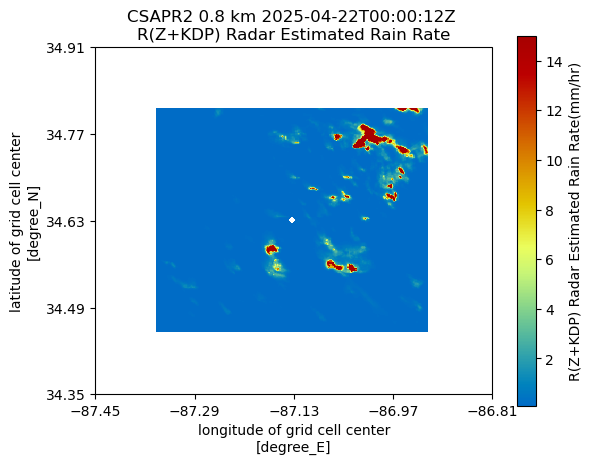

In [46]:
display = pyart.graph.GridMapDisplay(grid)
display.plot_grid('rain_combined',
                  level=1,
                  vmin=0.1,
                  vmax=15,
                  cmap='HomeyerRainbow')